# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [ ]:
def find_product(a,r,N):
    prev_value = a
    arr_product = [prev_value]

    for i in range(1, N):
      prev_value *= r
      arr_product.append(prev_value)

    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [ ]:
def check_palindrome(N):
    str_n = str(N)
    size = len(str_n)
    for i in range (0, size // 2):
      if (str_n[i] != str_n[size - i - 1]):
        return False
    return True

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    palindromes = []
    current_number = 1000
    while (len(palindromes) != N):
      if (check_palindrome(current_number)):
        palindromes.append(current_number)
      current_number += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [ ]:
from random import randint
def find_min(a, b, c):
    if (a < b):
      if (a < c):
        return a
      else:
        return c
    else:
      if (b < c):
        return b
      else:
        return c

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-49 -89 72 	Minimum: -89
94 83 87 	Minimum: 83
-53 97 -18 	Minimum: -53
-85 -96 4 	Minimum: -96
-52 61 -22 	Minimum: -52
46 24 86 	Minimum: 24
22 -8 43 	Minimum: -8
80 27 -80 	Minimum: -80
76 2 -9 	Minimum: -9
-64 -51 95 	Minimum: -64


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [ ]:
target_length = 17
target_sum = 6

mapper = lambda x: x * target_sum

my_array = mapper(np.random.dirichlet(np.ones(target_length), size = 1)[0])

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):    
    return abs((a - b).sum())

def calculate_euclidean(a, b):    
    return np.sqrt(((a - b) ** 2).sum())

def calculate_chebyshev(a, b):    
    return abs(a - b).max()

def calculate_cosine(a, b):    
    def magnitude(vector):
      return np.sqrt(sum(pow(element, 2) for element in vector))


    distance = np.matmul(np.transpose(a), b)
    return 1 - distance / (magnitude(a) * magnitude(b))

In [ ]:
max_length = 30
min_length = 3
target_length = np.random.randint(max_length) + min_length


def generate_array(length):
  max_value = 100
  return np.random.randint(max_value, size = length)


a = generate_array(target_length)
b = generate_array(target_length)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 113
Euclidean distance: 193.60526852335397
Chebyshev distance: 92
Cosine distance: 0.2892549286046032


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [ ]:
def transform(array):
    target_min_value = -4
    target_max_value = -1

    current_min_value = array.min()
    current_max_value = array.max()

    transformed_array = array.copy()
    np.place(
        transformed_array, 
        transformed_array == current_min_value, 
        target_min_value
    )
    np.place(
        transformed_array,
        transformed_array == current_max_value,
        target_max_value
    )

    def mapper(value):
      if (value == target_min_value):
        return target_min_value
      if (value == target_max_value):
        return target_max_value
      
      k = (value - current_min_value) / (current_max_value - current_min_value)
      new_value = (target_max_value - target_min_value) * k + target_min_value
      return new_value

    func = np.vectorize(mapper)
    return func(transformed_array)

In [ ]:
target_size = 76
max_value = 100
my_array = np.random.randint(max_value, size=target_size)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-1.91836735 -1.6122449  -3.63265306 -1.33673469 -2.46938776 -1.36734694
 -3.20408163 -2.25510204 -2.83673469 -3.81632653 -1.76530612 -2.65306122
 -3.35714286 -1.85714286 -2.86734694 -2.71428571 -3.90816327 -2.37755102
 -3.17346939 -2.13265306 -2.25510204 -1.21428571 -2.25510204 -1.21428571
 -2.74489796 -1.73469388 -3.20408163 -1.64285714 -1.18367347 -1.36734694
 -1.39795918 -2.7755102  -3.69387755 -3.63265306 -1.09183673 -2.34693878
 -2.74489796 -1.18367347 -3.23469388 -3.26530612 -1.97959184 -1.52040816
 -2.53061224 -1.18367347 -2.62244898 -2.68367347 -3.05102041 -2.59183673
 -1.03061224 -3.17346939 -3.08163265 -3.14285714 -3.57142857 -1.
 -2.68367347 -2.28571429 -2.89795918 -3.3877551  -2.56122449 -3.41836735
 -2.25510204 -1.06122449 -1.         -1.18367347 -1.67346939 -1.91836735
 -2.04081633 -3.54081633 -3.63265306 -1.64285714 -3.26530612 -3.17346939
 -1.33673469 -4.         -3.7244898  -2.62244898]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [ ]:
max_value = 43
min_value = -7

width = 8
height = 5

my_array = np.random.randint(max_value - min_value, size = (height, width)) + min_value
matrix = np.asmatrix(my_array)
selected_column = matrix.max(1)

print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (5, 8)
Array:
[[42 18 12 -5 29  4 12 -3]
 [32 35 22 17  0 41 26 42]
 [13  6 10 32 12 36 25 29]
 [10 40 22 32 16 36 36 -1]
 [31 23 36 -4 -1  3 14  9]]
Selected column: [[42]
 [42]
 [36]
 [40]
 [36]]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan


filter_arr = np.isnan(arr) == False
median = np.median(arr[filter_arr])
arr[idx] = median

print('Array:')
print(arr)

Array:
[0.48990157 0.3317478  0.10255269 0.3317478  0.99314901 0.3317478
 0.04820383 0.78625518 0.3317478  0.1530801 ]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [ ]:
def mean_channel(X):
    return np.mean(X, axis = (0, 1))

In [ ]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(mean_channel(X))

[-2.23798627 -2.08009153 -2.15789474]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [ ]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [ ]:
X = np.random.randint(4, 6, size=(n, 3, 3))
# print('Matrix:')
# print(X)
print('Unique rows:')
get_unique_columns(X)

Unique rows:


array([[[4, 4, 5],
        [5, 5, 4],
        [5, 5, 5]],

       [[4, 5, 5],
        [5, 4, 4],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 4, 5],
        [4, 5, 5]],

       [[5, 4, 5],
        [4, 5, 5],
        [4, 5, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[5, 5, 4],
        [5, 4, 4],
        [4, 5, 5]],

       [[5, 5, 4],
        [5, 5, 4],
        [5, 5, 5]],

       [[5, 5, 4],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [4, 4, 5]],

       [[5, 5, 5],
        [4, 4, 5],
        [5, 5, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [4, 5, 4]],

       [[4, 4, 5],
        [5, 4, 4],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [5, 5, 5]],

       [[5, 5, 5],
        [4, 5, 5],
        [4, 4, 4]],

       [[5, 5, 4],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 4, 4],
        [5, 5, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [4, 4, 5],
        [4, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [4]:
filename = 'titanic.csv'
dataset = pd.read_csv(filename, index_col=0)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [ ]:
#1. So, there are a lot of missing values. Columns: Age, Cabin, Embarked
print('#1\n')
display(dataset.isna().sum()[dataset.isna().any()])
print('\n')


#2.Percentage of survived passengers: 28%. Classes are balanced.
print('#2\n')
dataset.size / dataset['Survived'].sum()
survived = dataset[dataset['Survived'] == 1]
display(survived.groupby(['Pclass']).sum()['Survived'])
print('\n')

#3. Female more
print('#3\n')
display(survived.groupby(['Sex']).sum()['Survived'])
print('\n')

#4. Least popular port is Queenstown
print('#4\n')
targetDF = dataset.groupby(['Embarked']).count()
display(targetDF[targetDF['Survived'] == targetDF['Survived'].min()])
print('\n')

#5. There are 3 pclasses on Titanic
print('#5\n')
display(dataset['Pclass'].unique())
print('\n')

#6. Overall average ticket fare is 32.204. For classes: 1 - 84.154, 2 - 20.662, 3 - 13.675
print('#6\n')
dataset['Fare'].mean()
display(dataset.groupby('Pclass').mean()['Fare'])
print('\n')

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

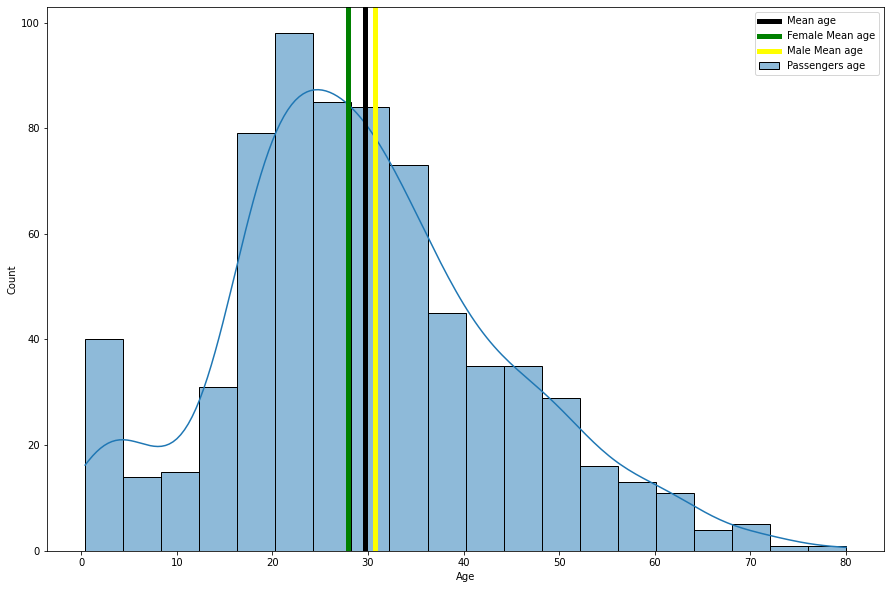

In [110]:
plt.subplots(figsize=(15,10))
sns.histplot(data = dataset['Age'], kde=True, label = 'Passengers age')
plt.axvline(dataset['Age'].mean(), label = 'Mean age', c = 'Black', lw = 5)

femaleDataset = dataset[dataset['Sex'] == 'female']
maleDataset = dataset[dataset['Sex'] == 'male']

plt.axvline(femaleDataset['Age'].mean(), label = 'Female Mean age', c = 'Green', lw = 5)
plt.axvline(maleDataset['Age'].mean(), label = 'Male Mean age', c = 'Yellow', lw = 5)
plt.legend()

plt.show()

# Minimum age is 0. Maximum age is 80.
# Mean age is about 30. Male mean age is about 31. Female mean age is about 28.

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [156]:
def getTitle(value):
  if ('.' in value):
    end_index = str(value).index('.')
    start_index = str(value)[:end_index].rfind(' ')
    return str(value)[start_index + 1 : end_index + 1]
  else:
    return ''

names = map(getTitle, dataset['Name'].to_numpy())
titles = np.array(list(names))
uniqueTitles = np.unique(titles)
print('Unique titles: ', uniqueTitles)
print('Unique titles count: ', uniqueTitles.size)

titlesDataset = dataset.copy()
titlesDataset['Titles'] = titles
print('\n')
print('Passengers for every class:')
display(titlesDataset.groupby('Titles').count()['Survived'])

maleTitlesDataset = titlesDataset[titlesDataset['Sex'] == 'male']
femaleTitlesDataset = titlesDataset[titlesDataset['Sex'] == 'female']

print('\n')
print('Male most popular title:')
maleCountDataset = maleTitlesDataset.groupby('Titles').count()
display(maleCountDataset[maleCountDataset['Survived'] == maleCountDataset['Survived'].max()])

print('\n')
print('Female most popular title:')
femaleCountDataset = femaleTitlesDataset.groupby('Titles').count()
display(femaleCountDataset[femaleCountDataset['Survived'] == femaleCountDataset['Survived'].max()])

Unique titles:  ['Capt.' 'Col.' 'Countess.' 'Don.' 'Dr.' 'Jonkheer.' 'Lady.' 'Major.'
 'Master.' 'Miss.' 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.' 'Sir.']
Unique titles count:  17


Passengers for every class:


Titles
Capt.          1
Col.           2
Countess.      1
Don.           1
Dr.            7
Jonkheer.      1
Lady.          1
Major.         2
Master.       40
Miss.        182
Mlle.          2
Mme.           1
Mr.          517
Mrs.         125
Ms.            1
Rev.           6
Sir.           1
Name: Survived, dtype: int64



Male most popular title:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Titles,,,,,,,,,,,
Mr.,517,517,517,517,398,517,517,517,517,93,517




Female most popular title:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Titles,,,,,,,,,,,
Miss.,182,182,182,182,146,182,182,182,182,47,181


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



Correlation:  -0.5494996199439074


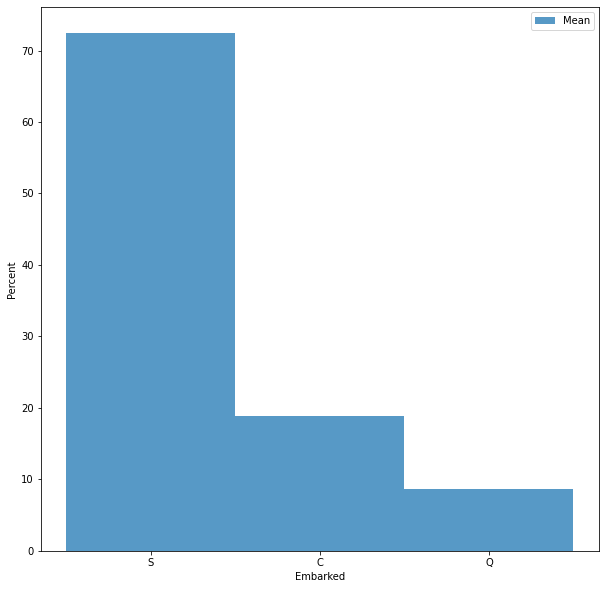

In [8]:
corr = dataset['Pclass'].corr(dataset['Fare'])
print('Correlation: ', corr)

plt.subplots(figsize = (10,10))
sns.histplot(dataset['Embarked'], label='Mean', stat="percent", linewidth=0)
plt.legend()
plt.show()

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [180]:
null_constant = 5

def embarkedMapping(value):
  if (pd.isnull(value)):
    return null_constant
  else:
    return ord(value)

embarkedDataset = dataset.copy()
embarkedValues = embarkedDataset['Embarked'].to_numpy()
embarkedValues = list(map(embarkedMapping, embarkedValues))

embarkedDataset['Embarked-Int'] = embarkedValues
corr = embarkedDataset['Embarked-Int'].corr(embarkedDataset['Fare'])
print('Correlation: ', corr)

[83, 67, 83, 83, 83, 81, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 81, 83, 83, 83, 67, 83, 81, 83, 67, 67, 81, 83, 67, 83, 67, 83, 83, 67, 83, 83, 67, 67, 81, 83, 81, 81, 67, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 83, 67, 5, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 67, 83, 83, 67, 83, 81, 83, 67, 83, 83, 83, 67, 83, 83, 67, 81, 83, 67, 83, 67, 83, 83, 83, 83, 67, 83, 83, 83, 67, 67, 83, 83, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 67, 83, 83, 83, 67, 83, 83, 83, 83, 81, 83, 81, 83, 83, 83, 83, 83, 67, 67, 81, 83, 81, 83, 83, 83, 83, 67, 83, 83, 83, 67, 81, 67, 83, 83, 83, 83, 81, 67, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 81, 83, 83, 67, 81, 83, 83, 83, 83, 

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [ ]:
## You code here